## 使うライブラリをインポートして，乱数のseedを固定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### フィッティングしたいデータセット$\mathcal{D}$を生成
$$\mathcal{D} = \{ (x_1,y_1),(x_2,y_2), \cdots , (x_N, y_N)\}$$

[[-0.05007295  8.14582518]
 [ 2.97444397  8.00846281]
 [-1.04457679 -5.27669595]
 [ 1.01278942  3.64309719]
 [ 9.42350407 22.67908514]]


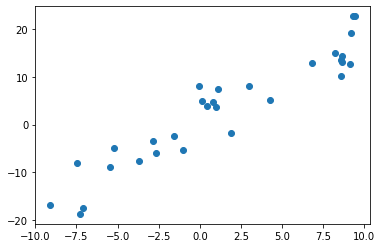

In [4]:
N = 30
x =  20 * (np.random.rand(N)) - 10
y = np.sin(x) + x + np.random.normal(x, 5, N)

# 2次元 * N個の観測データ
D = np.concatenate([x[:, np.newaxis], y[:, np.newaxis]], axis=1)
print(D[:5])

plt.scatter(x,y)
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）
$$ \boldsymbol{x}_i = \begin{pmatrix}
    1\\
    x_i
    \end{pmatrix}
$$

$$ \boldsymbol{X} = \begin{pmatrix}
     \boldsymbol{x_1}^T\\
    \boldsymbol{x_2}^T\\
    \vdots \\
    \boldsymbol{x_N}^T
    \end{pmatrix}
$$

$$\boldsymbol{y} = \begin{pmatrix}
    y_1\\
    y_2\\
    \vdots \\
    y_N
    \end{pmatrix}
$$

In [13]:
#detaset D で用いた変数を使って，欲しい行列・ベクトルを新しく定義する
# x(shape: (2, N)...これは(1,x_i)を並べた行列)
one = np.ones(N)
print(one)
print(one.shape)
print((one[:,np.newaxis].shape))
X = np.concatenate([one[:,np.newaxis],x[:,np.newaxis]],axis=1)
print(X[0:5])
# y（shape: (N,1)）になるようにshapeを整える）
y_reshaped = y 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(30,)
(30, 1)
[[ 1.         -0.05007295]
 [ 1.          2.97444397]
 [ 1.         -1.04457679]
 [ 1.          1.01278942]
 [ 1.          9.42350407]]


## モデルのパラメータ$\boldsymbol{a}$を推定する
$$\boldsymbol{a}
= \begin{pmatrix}a_0\\a_1\end{pmatrix}
= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

In [28]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = np.linalg.inv(X.T@X)@X.T@y
print(a.shape)
print(a)

(2,)
[0.6236742  1.79968636]


## 推定したモデル$\hat{y}$を描画する

In [41]:
# (1, x_{new})が縦に並ぶ行列Xnewをつくる
Nnew = 100
x_new = np.linspace(-10,10,Nnew)
ones = np.ones(Nnew)
Xnew = np.concatenate([ones[:,np.newaxis],x_new[:,np.newaxis]],axis=1)
print(Xnew.shape)
print(Xnew[0:5])
Y_hat = Xnew@a
print(Y_hat.shape)

(100, 2)
[[  1.         -10.        ]
 [  1.          -9.7979798 ]
 [  1.          -9.5959596 ]
 [  1.          -9.39393939]
 [  1.          -9.19191919]]
(100,)


## 観測データの分布上に学習したモデルをプロットする

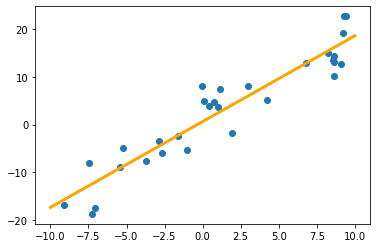

In [42]:
plt.scatter(x,y)
plt.plot(x_new, Y_hat, linewidth=3, color='orange')
plt.show()